### Decision Tree Model with Random Forest Classifier 

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
female_data=pd.read_csv('female_complete.csv')

In [3]:
female_data['Sport'].describe()

count         13897
unique            9
top       Athletics
freq           5403
Name: Sport, dtype: object

In [4]:
female_data['Medal'] = female_data['Medal'].fillna('NA')

In [5]:
male_data=pd.read_csv('male_gdp.csv')
male_data['Medal'] = male_data['Medal'].fillna('NA')

In [6]:
female_swim = female_data[female_data['Sport'] == 'Archery']

In [7]:
female_swim['Sport'].describe

<bound method NDFrame.describe of 12887    Archery
12888    Archery
12889    Archery
12890    Archery
12891    Archery
          ...   
13391    Archery
13392    Archery
13393    Archery
13394    Archery
13395    Archery
Name: Sport, Length: 509, dtype: object>

In [8]:
female_swim['Medal'].describe

<bound method NDFrame.describe of 12887        NA
12888        NA
12889        NA
12890        NA
12891        NA
          ...  
13391        NA
13392        NA
13393    Silver
13394      Gold
13395    Silver
Name: Medal, Length: 509, dtype: object>

In [9]:
female_swim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 12887 to 13395
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      509 non-null    int64  
 1   Unnamed: 0_x    509 non-null    int64  
 2   ID              509 non-null    int64  
 3   Name            509 non-null    object 
 4   Sex             509 non-null    object 
 5   Age             509 non-null    float64
 6   Height          509 non-null    float64
 7   Weight          509 non-null    float64
 8   NOC             509 non-null    object 
 9   Games           509 non-null    object 
 10  Year            509 non-null    int64  
 11  Season          509 non-null    object 
 12  City            509 non-null    object 
 13  Sport           509 non-null    object 
 14  Event           509 non-null    object 
 15  Medal           509 non-null    object 
 16  Team            509 non-null    object 
 17  Unnamed: 0_y    509 non-null 

In [10]:
# Extract Response and Predictors
y = pd.DataFrame(female_swim["Medal"]).astype('category')
X = pd.DataFrame(female_swim[["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]])

In [11]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (381, 1) (381, 6)
Test Set  : (128, 1) (128, 6)


In [12]:
#"Age", "Weight", "Height","GDP","Population","GDP Per Capita"

### Decision Tree Model accounting for class imbalance (SMOTE) + GraphViz visualisation

In [13]:
train_data= pd.concat([X_train, y_train.reindex(X_train.index)], axis=1)
train_data

,Age,Weight,Height,GDP,Population,GDP Per Capita,Medal
13207,25.0,72.0,170.0,1.000000e+12,49050000.0,20387.359837,Gold
13185,20.0,63.0,183.0,1.230000e+13,292805298.0,42007.436628,NA
13353,26.0,63.0,167.0,1.230000e+13,292805298.0,42007.436628,NA
12895,17.0,66.0,165.0,8.640000e+11,79512426.0,10866.226117,NA
13146,29.0,64.0,174.0,4.710000e+11,37948016.0,12411.716070,NA
...,...,...,...,...,...,...,...
12963,26.0,59.0,166.0,1.060000e+07,22390000.0,0.473426,NA
13167,39.0,70.0,170.0,1.950000e+12,82211508.0,23719.307034,Bronze
12922,25.0,59.0,161.0,5.440000e+11,9519374.0,57146.614893,NA
13306,18.0,55.0,170.0,3.140000e+11,29170456.0,10764.315786,NA


In [14]:
NA_train_swim = train_data[train_data['Medal'] == 'NA']

Number of Medal Types : 4
NA        446
Bronze     23
Silver     20
Gold       20
Name: Medal, dtype: int64


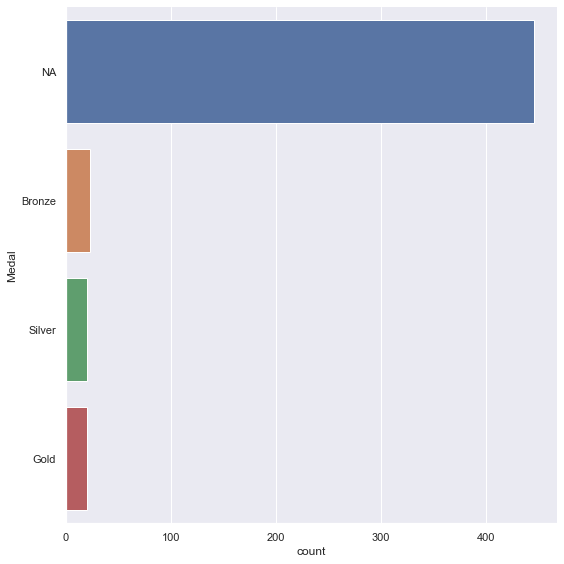

In [15]:
# Primary Types in the Dataset
print("Number of Medal Types :", len(female_swim["Medal"].unique()))

# Pokemons of each Primary Type
print(female_swim["Medal"].value_counts())
sb.catplot(y = "Medal", data = female_swim, kind = "count", height = 8)

In [16]:
#train_data['Medal']=train_data['Medal'].replace('NA',0)
#train_data['Medal']=train_data['Medal'].replace('Gold',1)
#train_data['Medal']=train_data['Medal'].replace('Silver',1)
#train_data['Medal']=train_data['Medal'].replace('Bronze',1)
#train_data.head(20)
print(X_train.shape, y_train.shape)

(381, 6) (381, 1)


In [17]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE
#Oversampling the data
smote = SMOTE()
X, y = smote.fit_resample(X_train, y_train)

print(X.shape, y.shape)

(1324, 6) (1324, 1)


In [18]:
SMOTE_sample= pd.concat([X, y.reindex(X.index)], axis=1)
SMOTE_sample

,Age,Weight,Height,GDP,Population,GDP Per Capita,Medal
0,25.000000,72.000000,170.000000,1.000000e+12,4.905000e+07,20387.359837,Gold
1,20.000000,63.000000,183.000000,1.230000e+13,2.928053e+08,42007.436628,NA
2,26.000000,63.000000,167.000000,1.230000e+13,2.928053e+08,42007.436628,NA
3,17.000000,66.000000,165.000000,8.640000e+11,7.951243e+07,10866.226117,NA
4,29.000000,64.000000,174.000000,4.710000e+11,3.794802e+07,12411.716070,NA
...,...,...,...,...,...,...,...
1319,20.000000,63.508844,169.813605,6.958313e+11,6.515222e+07,11379.484752,Silver
1320,25.009267,73.587315,169.284390,1.075808e+12,1.166620e+08,9745.744989,Silver
1321,26.484154,70.809846,168.484154,1.630775e+12,7.384593e+08,5073.473521,Silver
1322,21.521279,58.729790,168.895744,4.324765e+12,1.321675e+09,3268.225227,Silver


In [19]:
X_test

,Age,Weight,Height,GDP,Population,GDP Per Capita
13157,19.0,62.0,165.0,7.884519e+10,75381899.0,1045.943208
13115,24.0,60.0,168.0,2.600000e+11,8872109.0,29305.320753
13018,28.0,76.0,169.0,2.660000e+12,63700300.0,41758.045096
13152,22.0,51.0,173.0,8.976860e+10,5431000.0,16528.926169
12939,26.0,63.0,165.0,3.126153e+10,49175848.0,635.708964
...,...,...,...,...,...,...
13199,23.0,65.0,167.0,6.488306e+10,47451600.0,1367.352433
13111,38.0,64.0,170.0,1.620000e+13,313998379.0,51592.623031
13303,24.0,73.0,172.0,1.260000e+11,5176209.0,24342.139199
13241,42.0,63.0,172.0,1.930000e+11,10746740.0,17958.934523


Number of Medal Types : 4
Bronze    331
Gold      331
NA        331
Silver    331
Name: Medal, dtype: int64


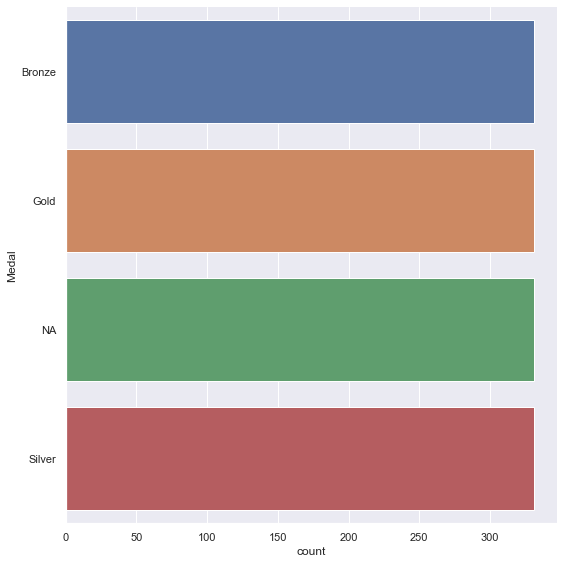

In [20]:
# Primary Types in the Dataset
print("Number of Medal Types :", len(SMOTE_sample["Medal"].unique()))

# Pokemons of each Primary Type
print(SMOTE_sample["Medal"].value_counts())
sb.catplot(y = "Medal", data = SMOTE_sample, kind = "count", height = 8)

Train Set : (993, 1) (993, 6)
Test Set  : (331, 1) (331, 6)
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9748237663645518

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9305135951661632



<AxesSubplot:>

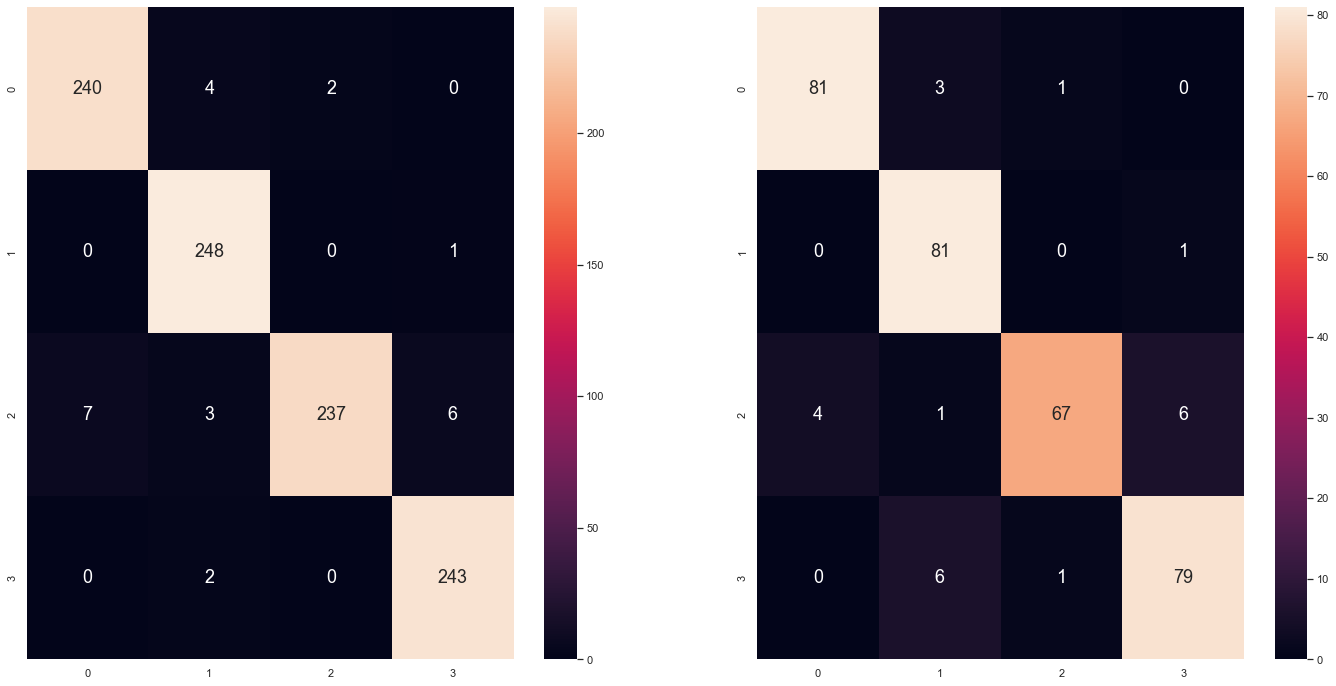

In [21]:
# Extract Response and Predictors
y_balanced = pd.DataFrame(SMOTE_sample["Medal"]).astype('category')
x_balanced = pd.DataFrame(SMOTE_sample[["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]])

# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X1_train, X1_test, Y_train, Y_test = train_test_split(x_balanced, y_balanced, test_size = 0.25)

# Check the sample sizes
print("Train Set :", Y_train.shape, X1_train.shape)
print("Test Set  :", Y_test.shape, X1_test.shape)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Random Forest using Train Data
rforest = RandomForestClassifier(n_estimators = 100, max_depth = 10)  # create the object
rforest.fit(X1_train, Y_train.values.ravel())                         # train the model

# Predict Response corresponding to Predictors
Y_train_pred = rforest.predict(X1_train)
Y_test_pred = rforest.predict(X1_test)


#GOODNESS OF FIT

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X1_train, Y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X1_test, Y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(24, 12))
sb.heatmap(confusion_matrix(Y_train, Y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(Y_test, Y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Horizontal=actual, vertical=predict

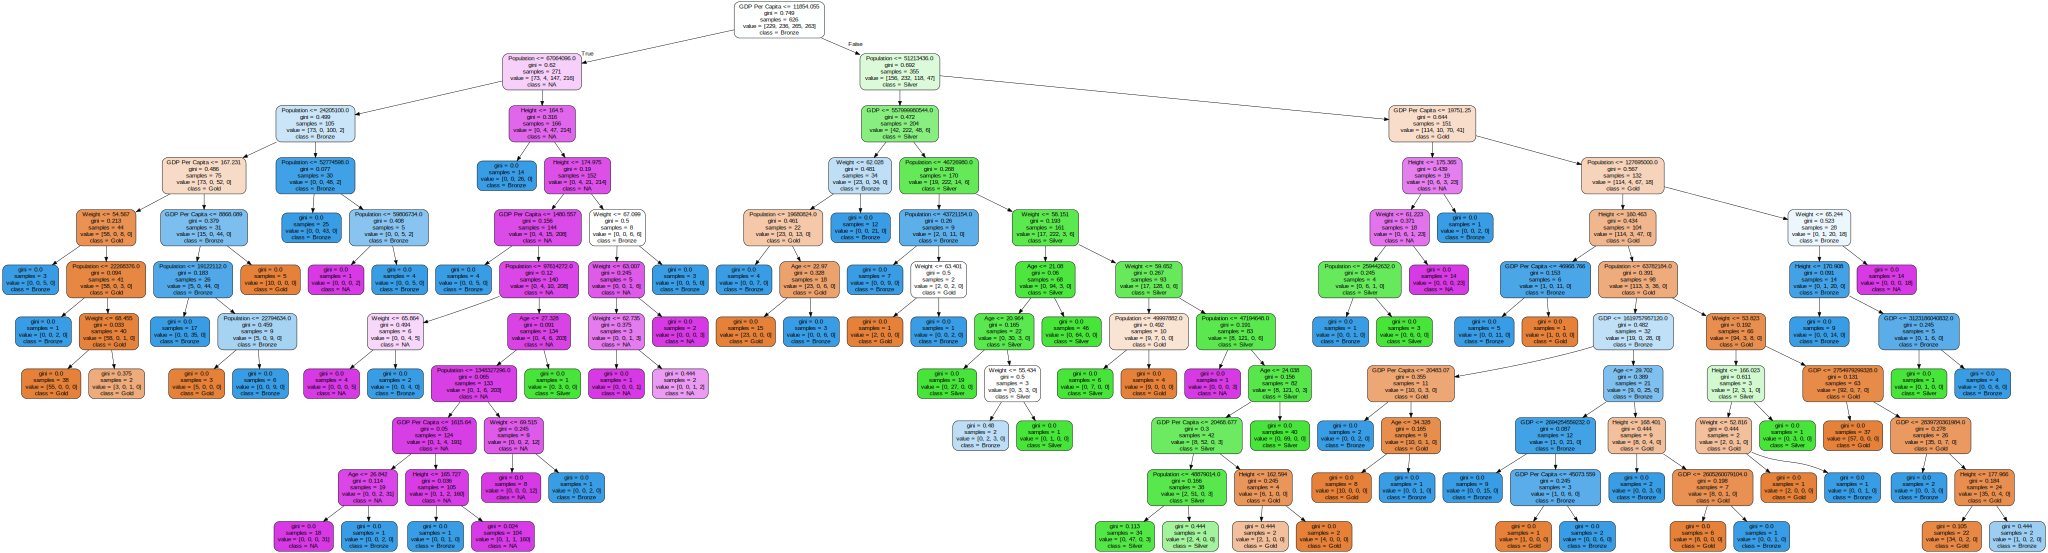

In [22]:
estimator = rforest.estimators_[5]

import graphviz

from sklearn import tree
feature_names = ["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]
dot_data = tree.export_graphviz(estimator, out_file=None, filled=True, rounded = True, feature_names=["Age", "Weight", "Height","GDP","Population","GDP Per Capita"], class_names=['Gold', 'Silver', 'Bronze','NA'])
graph = graphviz.Source(dot_data)
graph

In [23]:
graph.render("Tree_female_swim")

'Tree_female_swim.pdf'

### Predictions

In [24]:
y_test_pred = rforest.predict(X_test)
print("Classification Accuracy \t:", rforest.score(X_test, y_test))

Classification Accuracy 	: 0.8203125


<AxesSubplot:>

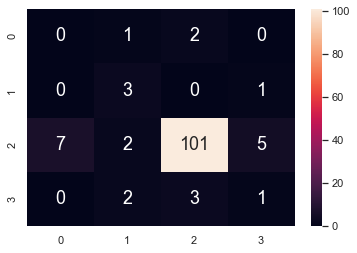

In [25]:
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})